In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
lats = np.random.uniform(-90,90,size=1500)
lngs = np.random.uniform(-90,90,size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
for coordinate in coordinates:
    print(coordinate[0],coordinate[1])

26.449026417599597 -3.114705317661816
36.10203929624636 -2.657776145285041
77.29068051827977 -32.85761800291371
-85.58662496430519 -36.1492405906422
43.273044789236565 -43.6714344724343
14.733272688144595 -84.33762206677906
47.721767915521525 75.61975754455432
42.663840021415496 65.30596310334931
-89.77268084196984 33.54281985620216
44.86184832523281 74.87815013645823
13.676551268149439 19.66355918611559
60.165300258892586 83.74864031478293
-0.8925315927686484 59.26956767801556
8.50649436998738 56.964107394827835
-63.14115781171442 59.01773370685336
83.91037873904224 51.7768415167923
8.886656729407662 -72.94011922445877
8.070187217096858 48.69040224601824
43.75211354076322 86.58299423880106
-46.695193999710526 31.316021332540615
37.375766936231926 84.01536169465498
-35.41700206196613 -49.903494434475625
-27.613541723117564 -16.140728007712497
-27.33173276883864 9.068661734182527
11.020943267859238 -74.63567606231685
-8.1890397998134 66.26635551337912
-75.87487964609181 -27.038232533399

43.83566273057005 -60.63084219488059
-56.99660572797857 51.89911310452325
67.72826686694859 86.66937873668581
40.69868961496712 -13.695332399930976
-42.39308127447809 -16.831956007362223
47.194246427477395 -80.5685797594667
9.037259848857147 3.2614672237751847
12.491098755154354 -17.58951603660411
86.18011403937524 33.29234503723876
-39.65295599335681 -78.67795527544556
22.893863269553563 6.3688258906579165
15.44119525672592 63.014478970780374
22.70011089355725 -37.2767059005173
62.906473067495085 -73.10784697821904
-24.837459656431378 7.852714997822687
-23.364656782405163 77.17727786870842
80.20525359386778 25.782741209942216
-8.540706039054797 61.38654510195593
-42.701039757168985 33.59430539438506
-12.729789350460806 6.572707613968674
-38.25962457160044 -83.59597178710705
-7.408167613949843 51.8384588141852
55.761227552931416 -69.50520226313903
-80.78689814270147 27.62773684675291
74.81275937940677 -87.77400997411787
35.32382215672797 -1.3043065732935872
-0.293590764027158 -22.08441

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

611

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):
   
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | adrar
Processing Record 2 of Set 1 | roquetas de mar
Processing Record 3 of Set 1 | tasiilaq
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | torbay
Processing Record 6 of Set 1 | waspan
Processing Record 7 of Set 1 | balkhash
Processing Record 8 of Set 1 | shieli
Processing Record 9 of Set 1 | port elizabeth
Processing Record 10 of Set 1 | shu
Processing Record 11 of Set 1 | oum hadjer
Processing Record 12 of Set 1 | togur
Processing Record 13 of Set 1 | victoria
Processing Record 14 of Set 1 | bandarbeyla
Processing Record 15 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 16 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 17 of Set 1 | tibu
Processing Record 18 of Set 1 | garowe
Processing Record 19 of Set 1 | shihezi
Processing Record 20 of Set 1 | port alfred
Processing Record 21 of Set 1 | kuche
City not found. Skipping...
Processing Record 22 of Set 1 | santa vitoria do palmar
Processin

Processing Record 39 of Set 4 | porto novo
Processing Record 40 of Set 4 | abu kamal
Processing Record 41 of Set 4 | darya khan mari
City not found. Skipping...
Processing Record 42 of Set 4 | ilhabela
Processing Record 43 of Set 4 | mahibadhoo
Processing Record 44 of Set 4 | jambol
City not found. Skipping...
Processing Record 45 of Set 4 | amapa
Processing Record 46 of Set 4 | gravdal
Processing Record 47 of Set 4 | yar-sale
Processing Record 48 of Set 4 | lagoa
Processing Record 49 of Set 4 | lexington park
Processing Record 50 of Set 4 | de aar
Processing Record 1 of Set 5 | berlevag
Processing Record 2 of Set 5 | storslett
Processing Record 3 of Set 5 | belgaum
Processing Record 4 of Set 5 | ahtopol
Processing Record 5 of Set 5 | hasselt
Processing Record 6 of Set 5 | quelimane
Processing Record 7 of Set 5 | yarmouth
Processing Record 8 of Set 5 | sembe
Processing Record 9 of Set 5 | riosucio
Processing Record 10 of Set 5 | chimbote
Processing Record 11 of Set 5 | clyde river
Proc

Processing Record 31 of Set 8 | springdale
Processing Record 32 of Set 8 | ifanadiana
Processing Record 33 of Set 8 | leibnitz
Processing Record 34 of Set 8 | murdochville
Processing Record 35 of Set 8 | asyut
Processing Record 36 of Set 8 | ostersund
Processing Record 37 of Set 8 | marsh harbour
Processing Record 38 of Set 8 | kutahya
Processing Record 39 of Set 8 | abha
Processing Record 40 of Set 8 | lobatse
Processing Record 41 of Set 8 | bjala
City not found. Skipping...
Processing Record 42 of Set 8 | benghazi
Processing Record 43 of Set 8 | nalut
Processing Record 44 of Set 8 | amherst center
Processing Record 45 of Set 8 | imbituba
Processing Record 46 of Set 8 | karpogory
Processing Record 47 of Set 8 | gualeguay
Processing Record 48 of Set 8 | ostrovnoy
Processing Record 49 of Set 8 | ondjiva
Processing Record 50 of Set 8 | omboue
Processing Record 1 of Set 9 | luau
Processing Record 2 of Set 9 | estelle
Processing Record 3 of Set 9 | carnarvon
Processing Record 4 of Set 9 | 

Processing Record 21 of Set 12 | mossendjo
Processing Record 22 of Set 12 | bargal
City not found. Skipping...
Processing Record 23 of Set 12 | semey
Processing Record 24 of Set 12 | horta
Processing Record 25 of Set 12 | antofagasta
Processing Record 26 of Set 12 | bur gabo
City not found. Skipping...
Processing Record 27 of Set 12 | sirfa
City not found. Skipping...
Processing Record 28 of Set 12 | mangrol
Processing Record 29 of Set 12 | lokoja
Processing Record 30 of Set 12 | virginia beach
Processing Record 31 of Set 12 | naron
Processing Record 32 of Set 12 | qurayyat
Processing Record 33 of Set 12 | aasiaat
Processing Record 34 of Set 12 | iskar
Processing Record 35 of Set 12 | brokopondo
Processing Record 36 of Set 12 | folldal
Processing Record 37 of Set 12 | eirunepe
Processing Record 38 of Set 12 | amur
Processing Record 39 of Set 12 | itaunja
Processing Record 40 of Set 12 | durusu
Processing Record 41 of Set 12 | surgut
Processing Record 42 of Set 12 | nizwa
Processing Rec

In [12]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Adrar,20.50,-10.07,94.91,17,45,8.68,MR,2020-04-15 16:27:33
1,Roquetas De Mar,36.76,-2.61,66.20,82,100,6.93,ES,2020-04-15 16:27:33
2,Tasiilaq,65.61,-37.64,30.20,74,75,4.70,GL,2020-04-15 16:27:33
3,Ushuaia,-54.80,-68.30,51.80,66,20,5.55,AR,2020-04-15 16:27:33
4,Torbay,47.67,-52.73,50.00,36,75,9.17,CA,2020-04-15 16:27:33
5,Waspan,14.74,-83.97,89.60,66,40,11.41,NI,2020-04-15 16:27:33
6,Balkhash,46.84,74.98,50.07,41,33,4.94,KZ,2020-04-15 16:27:33
7,Shieli,44.17,66.75,57.02,31,61,9.84,KZ,2020-04-15 16:27:33
8,Port Elizabeth,-33.92,25.57,64.40,82,32,3.36,ZA,2020-04-15 16:23:32
9,Shu,43.60,73.76,49.28,53,100,2.37,KZ,2020-04-15 16:27:34


In [13]:
new_column_order = ["City","Country","Date","Lat","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df[new_column_order]

,City,Country,Date,Lat,Max Temp,Humidity,Cloudiness,Wind Speed
0,Adrar,MR,2020-04-15 16:27:33,20.50,94.91,17,45,8.68
1,Roquetas De Mar,ES,2020-04-15 16:27:33,36.76,66.20,82,100,6.93
2,Tasiilaq,GL,2020-04-15 16:27:33,65.61,30.20,74,75,4.70
3,Ushuaia,AR,2020-04-15 16:27:33,-54.80,51.80,66,20,5.55
4,Torbay,CA,2020-04-15 16:27:33,47.67,50.00,36,75,9.17
...,...,...,...,...,...,...,...,...
561,Archidona,ES,2020-04-15 16:28:24,37.10,66.20,93,75,11.41
562,Tambacounda,SN,2020-04-15 16:28:25,13.75,105.80,14,12,9.17
563,Puerto Carreno,CO,2020-04-15 16:28:00,6.19,93.20,36,53,6.93
564,Kherson,UA,2020-04-15 16:25:49,46.66,51.01,32,0,13.78


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Retrieve the data we need to create our scatter plots
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [16]:
import time

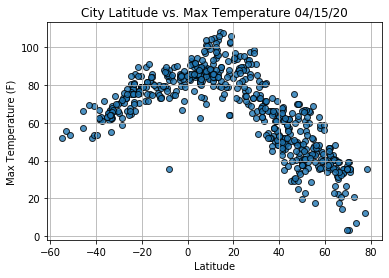

In [17]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor = "black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")
    
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

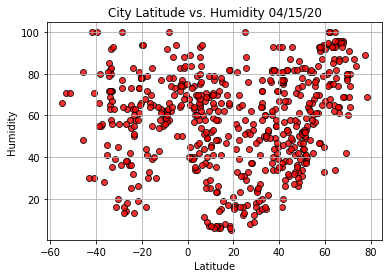

In [18]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor = "black",
            linewidths=1,
            color="red",
            marker="o",
            alpha=0.8,
            label="Cities")
    
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

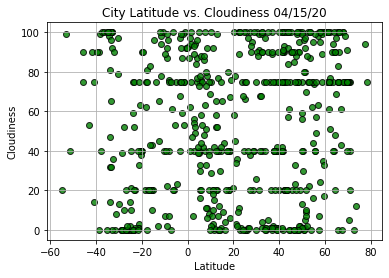

In [19]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor = "black",
            linewidths=1,
            color="green",
            marker="o",
            alpha=0.8,
            label="Cities")
    
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

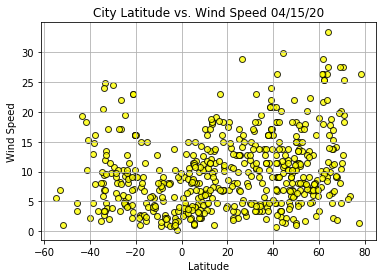

In [20]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor = "black",
            linewidths=1,
            color="yellow",
            marker="o",
            alpha=0.8,
            label="Cities")
    
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [21]:
from scipy.stats import linregress

In [22]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show() 

In [23]:
index13 = city_data_df.loc[13]
index13

City                  Bandarbeyla
Lat                          9.49
Lng                         50.81
Max Temp                    83.84
Humidity                       69
Cloudiness                      8
Wind Speed                  12.59
Country                        SO
Date          2020-04-15 16:27:34
Name: 13, dtype: object

In [24]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3      False
4       True
       ...  
561     True
562     True
563     True
564     True
565     True
Name: Lat, Length: 566, dtype: bool

In [25]:
# Create Northern Hemisphere DataFrame.
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Adrar,20.50,-10.07,94.91,17,45,8.68,MR,2020-04-15 16:27:33
1,Roquetas De Mar,36.76,-2.61,66.20,82,100,6.93,ES,2020-04-15 16:27:33
2,Tasiilaq,65.61,-37.64,30.20,74,75,4.70,GL,2020-04-15 16:27:33
4,Torbay,47.67,-52.73,50.00,36,75,9.17,CA,2020-04-15 16:27:33
5,Waspan,14.74,-83.97,89.60,66,40,11.41,NI,2020-04-15 16:27:33


In [26]:
# Create Southern Hemisphere DataFrame.
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,Ushuaia,-54.80,-68.30,51.80,66,20,5.55,AR,2020-04-15 16:27:33
8,Port Elizabeth,-33.92,25.57,64.40,82,32,3.36,ZA,2020-04-15 16:23:32
17,Port Alfred,-33.59,26.89,62.01,92,65,12.01,ZA,2020-04-15 16:27:34
18,Santa Vitoria Do Palmar,-33.52,-53.37,62.87,80,100,24.87,BR,2020-04-15 16:22:45
20,Luderitz,-26.65,15.16,66.20,63,0,21.92,NA,2020-04-15 16:27:34


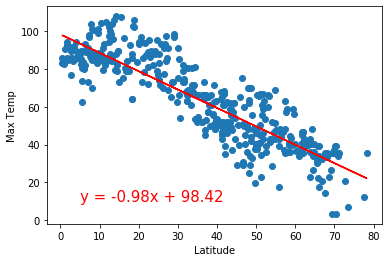

In [27]:
# Linear regression on the Northern Hemisphere 
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 
                       'Max Temp',(5,10))

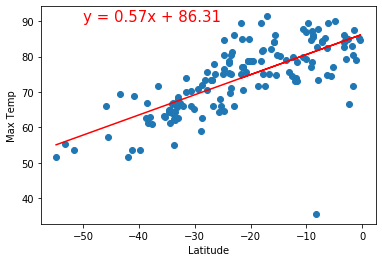

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 
                       'Max Temp',(-50,90))

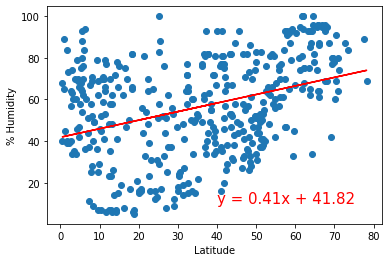

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', 
                       '% Humidity',(40,10))

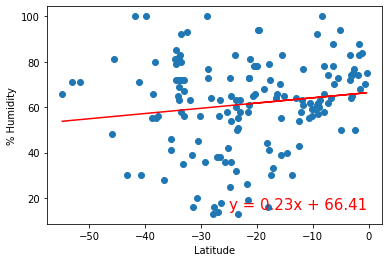

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', 
                       '% Humidity',(-25,15))

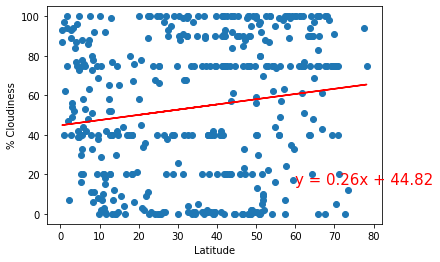

In [37]:
## Skill Drill 6.4.4
# Perform Linear Regression on the Percent Cloudiness for the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', 
                       '% Cloudiness',(60,15))

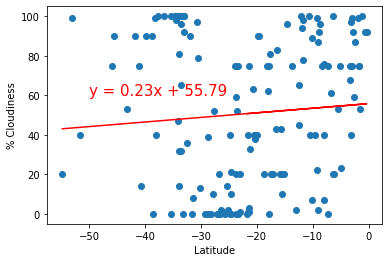

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', 
                       '% Cloudiness',(-50,60))

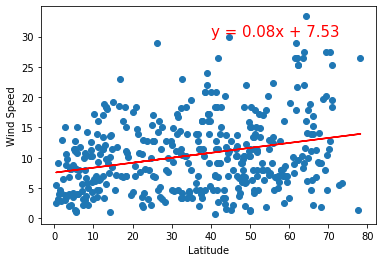

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 
                       'Wind Speed',(40,30))

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 
                       'Wind Speed',(-50,35))

SyntaxError: EOL while scanning string literal (<ipython-input-43-8c4f0e57bb27>, line 6)